<h1> Compute Fields </h1>

This Jupyter notebook is used to compute the required globally averaged observables and 2D observable fields from GCM data. The actual codes can be found in the submap "python_codes".

In order for this to work, radiative kernels need to be provided in a submap named 'kernels'. Code has been designed and tested using CAM5 kernels by Pendergrass et al (2018); Pendergrass (2017). These kernels were downloaded from https://doi.org/10.5065/D6F47MT6 and accompanying software from https://doi.org/10.5281/zenodo.997899.

Running this notebook should yield a subfolder 'Data' that includes two subfolders: (1) 'fields' containing 2D fields (height/pressure-averaged for 3D observables) and (2) 'global' containing the globally averaged values

<h2> Packages </h2>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import intake
import warnings
import os
import sys

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

# Prevent warnings to clutter up the whole notebook,
warnings.simplefilter('ignore')

In [2]:
## Import the custom python codes
sys.path.insert(0, './python_codes')

# for computations of 2D fields and 3D fields
from computations_averages import compute_feedback_timeseries
from computations_averages import compute_GMST_imbalance

<h1> Download data and process it to globally averaged yearly values </h1>

In [3]:
# URL for the CMIP6 data
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)

In [4]:
model_name = 'CESM2'

<h2> Computations for variables (including 2D fields) </h2>

In [5]:
fb = compute_feedback_timeseries(col, model_name)

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 2 group(s)
Computed dLW_ts_field
Computed dLW_ts
Computed dts
Computed dLW_CS_ts_field
Computed dLW_CS_ts
Found dataset dts -- skipping recomputation
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 2 group(s)
Computed dLW_ta_field
Computed dLW_ta
Computed dLW_CS_ta_field
Computed dLW_CS_ta
Computed dLW_planck_atm_field
Computed dLW_planck_atm
Computed dLW_CS_planck_atm_field
Computed dLW_CS_planck_atm
Computed dLW_lr_field
Computed dLW_lr
Computed dLW_CS_lr_field
Computed dLW_C

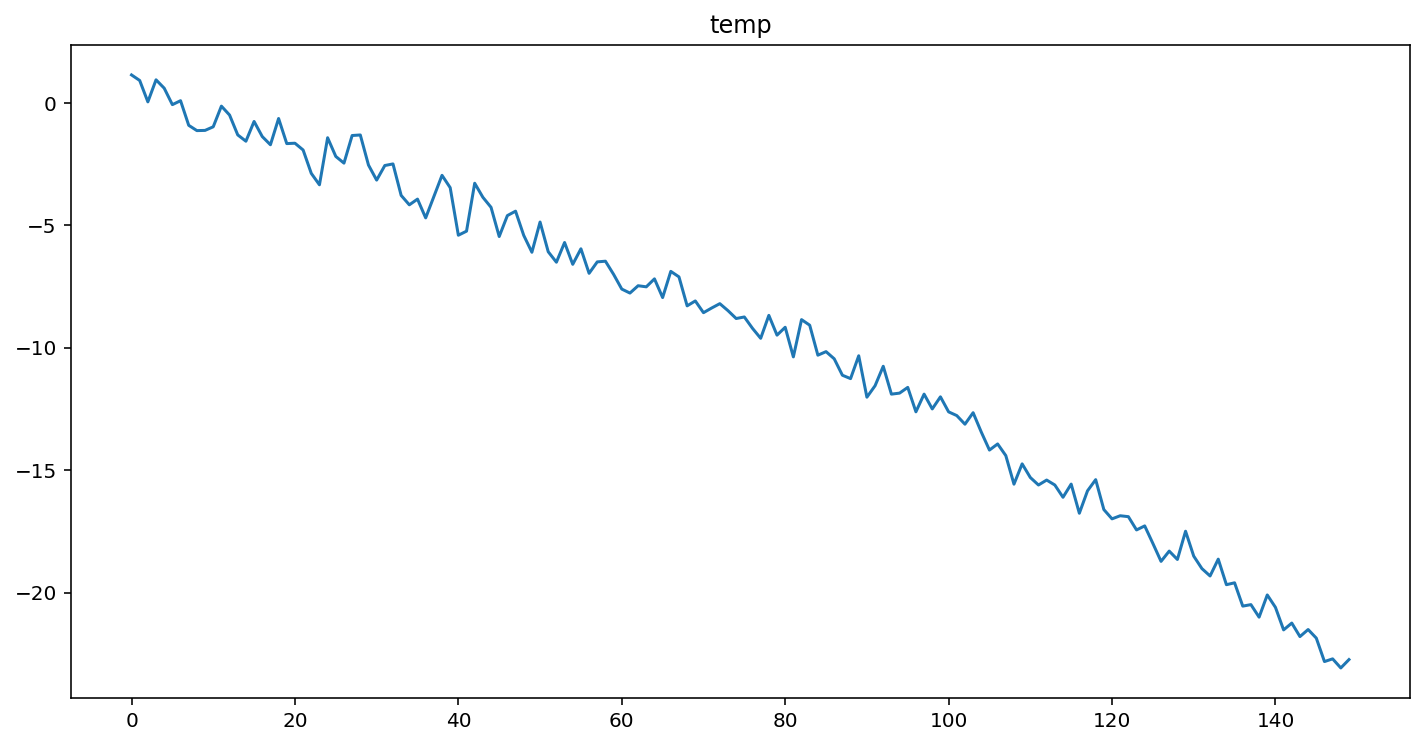

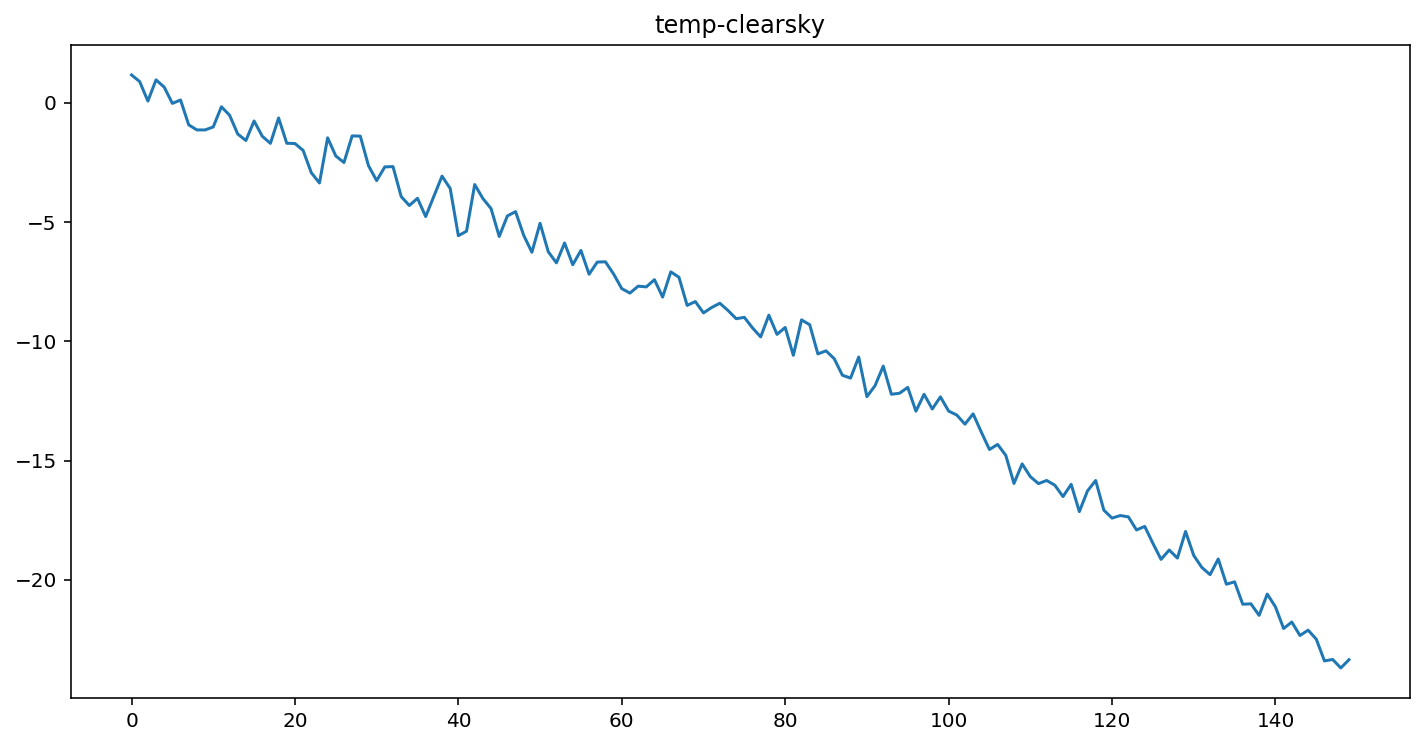

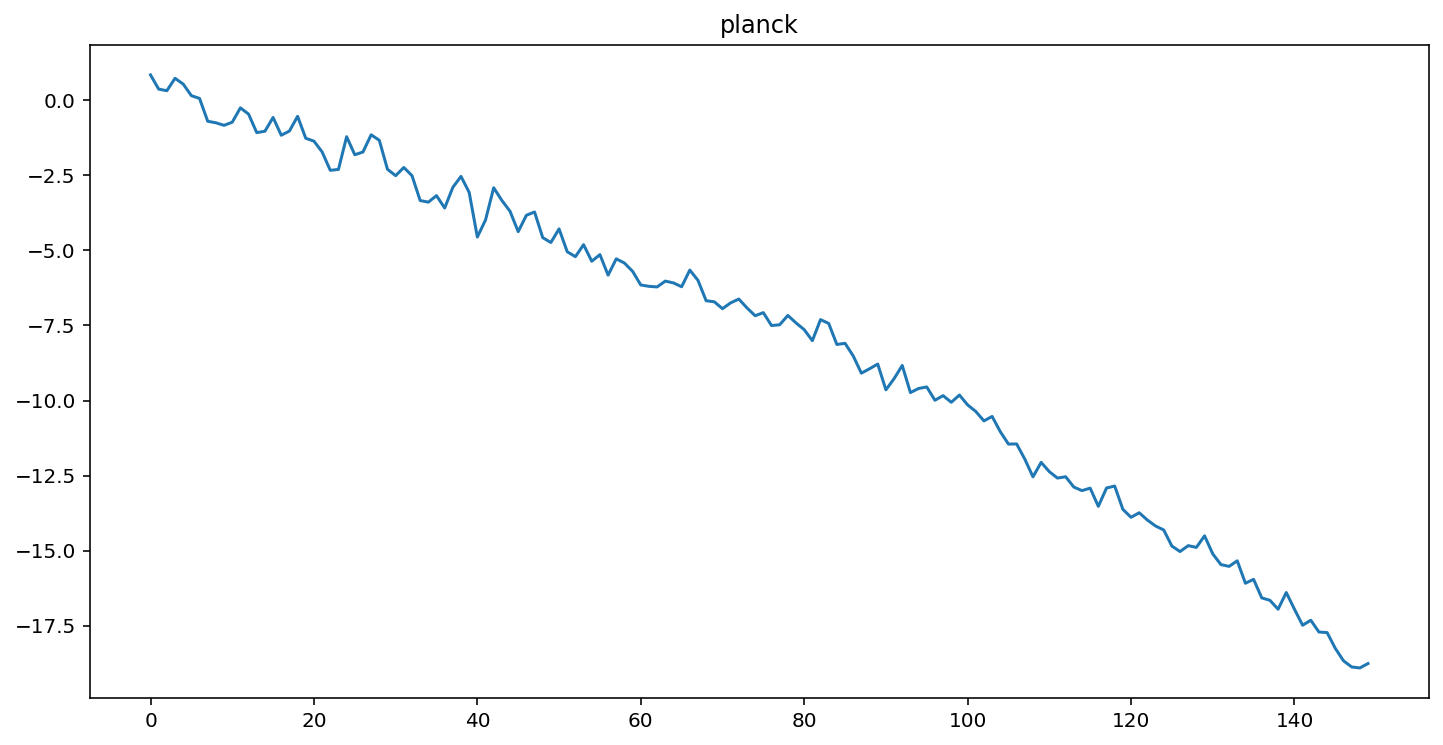

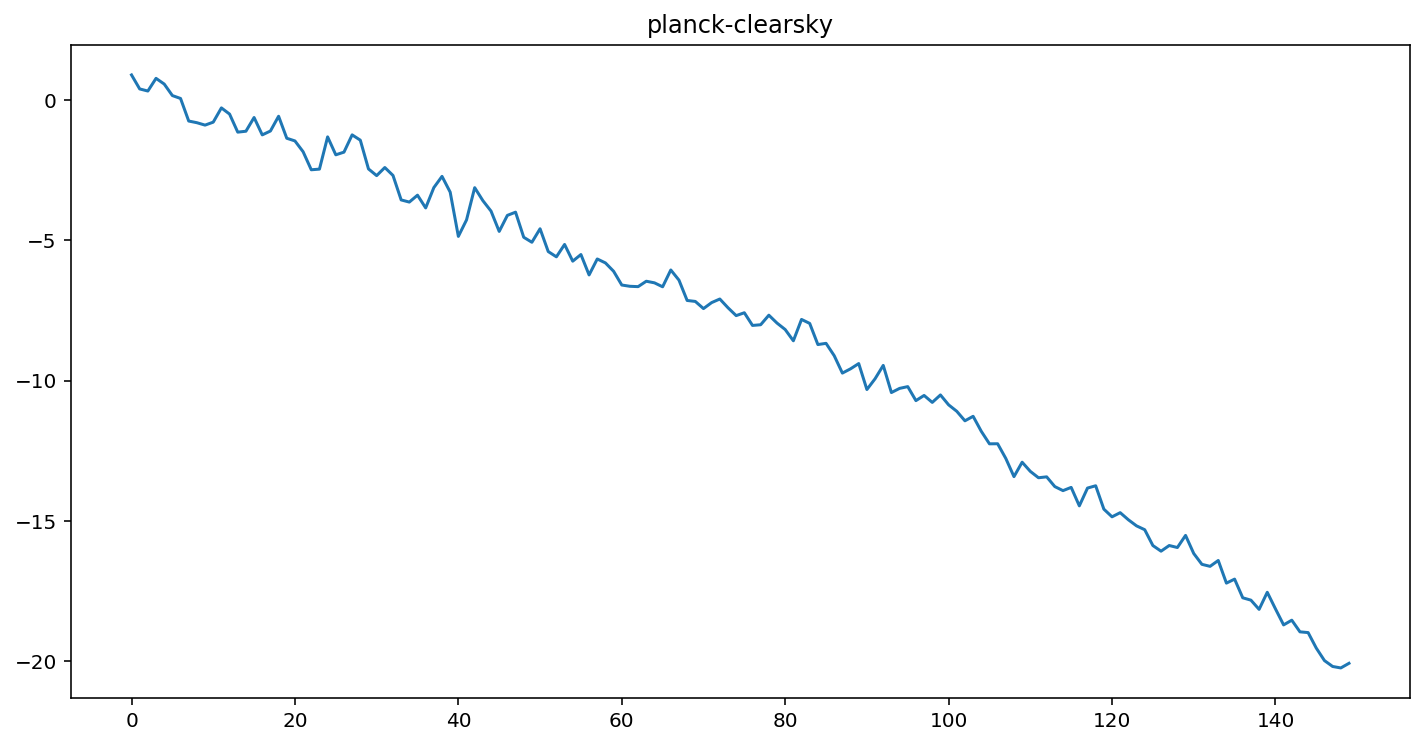

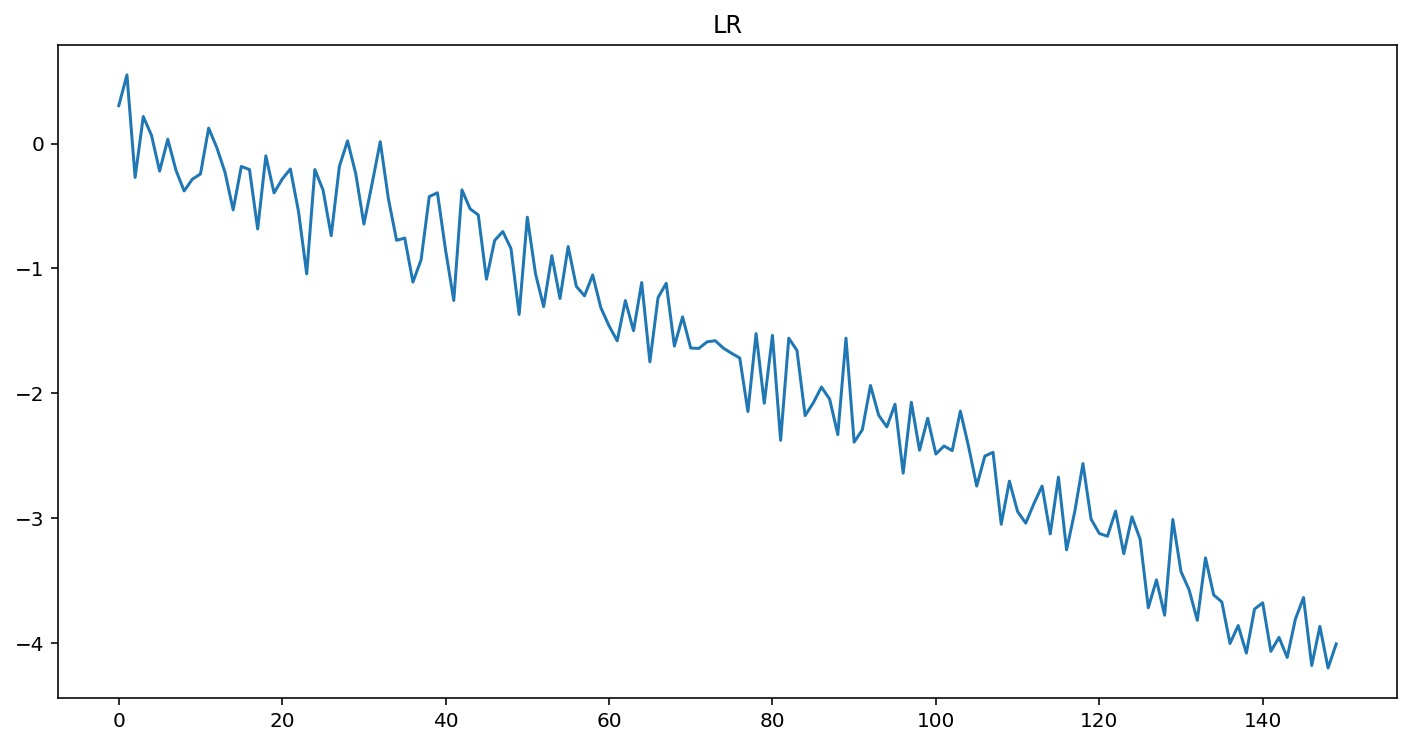

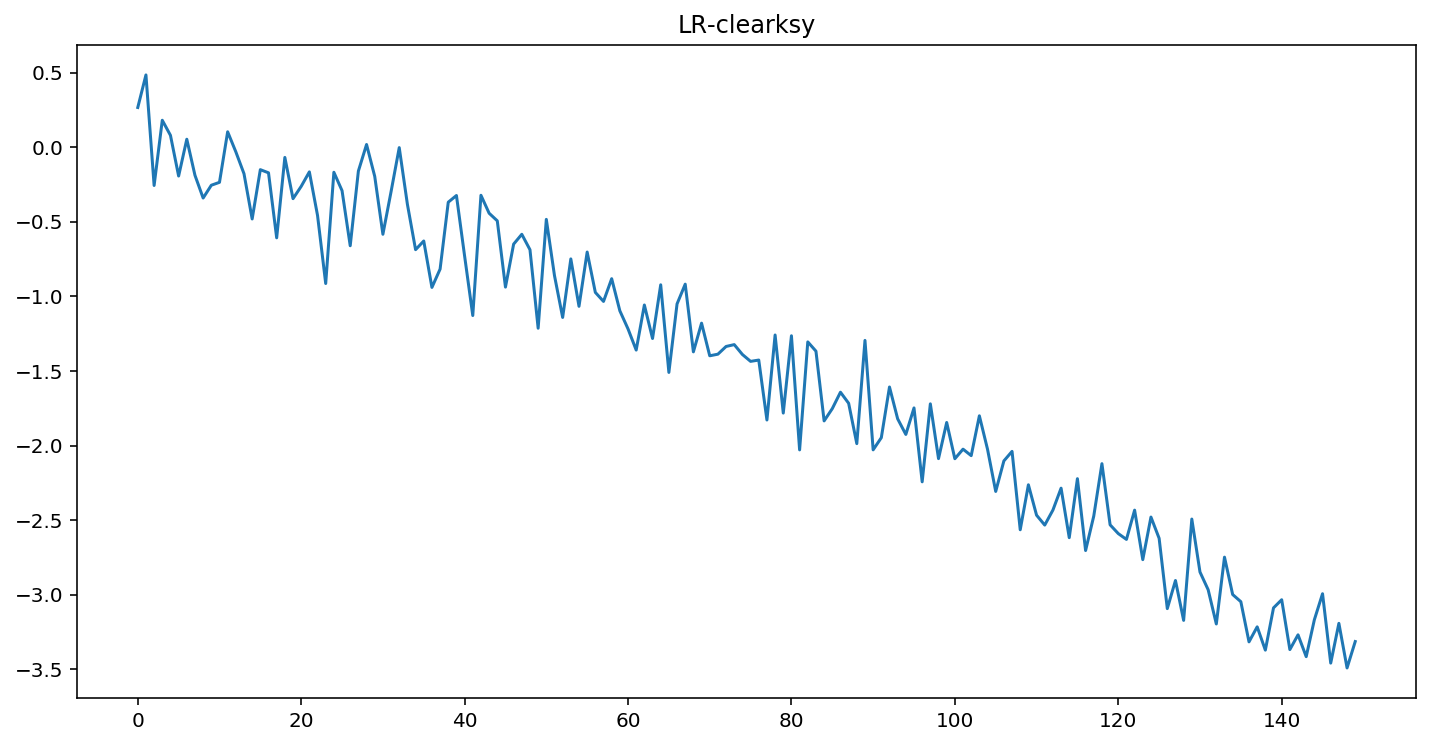

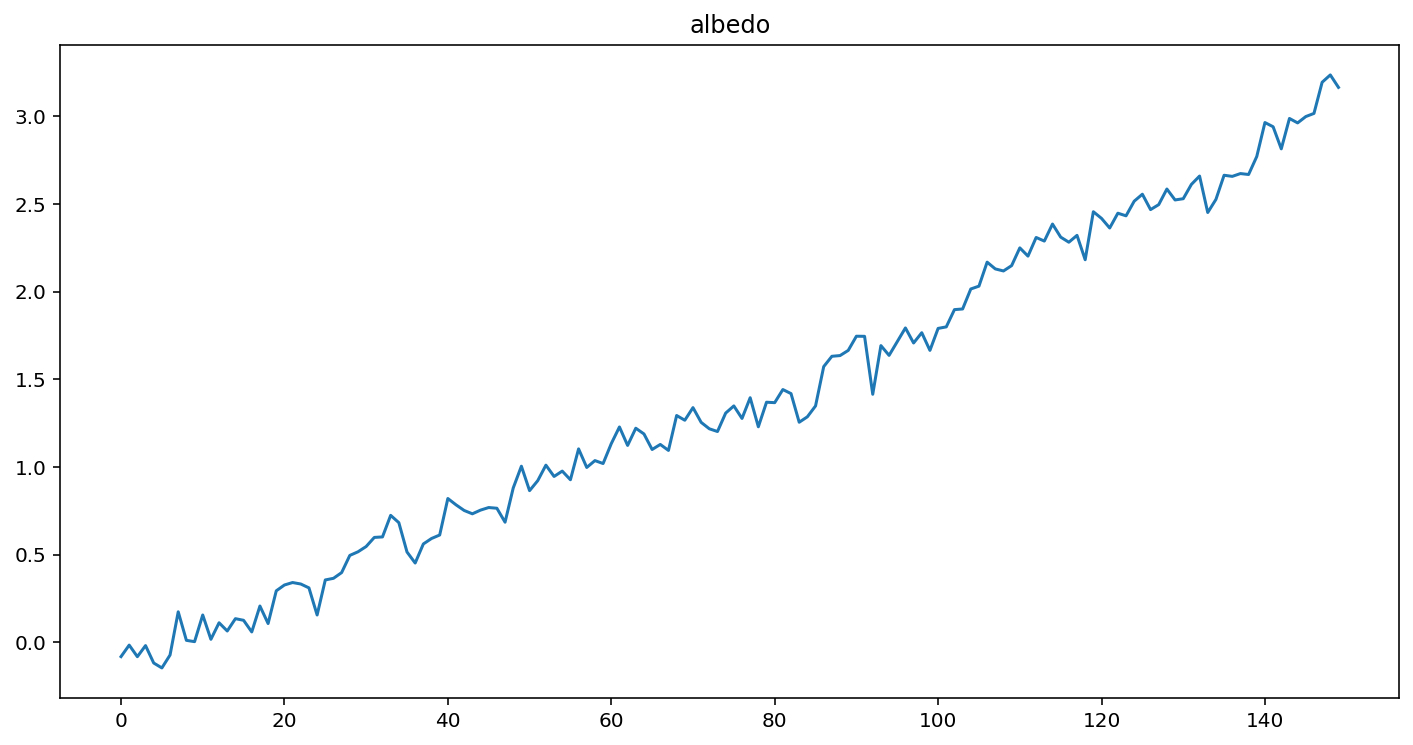

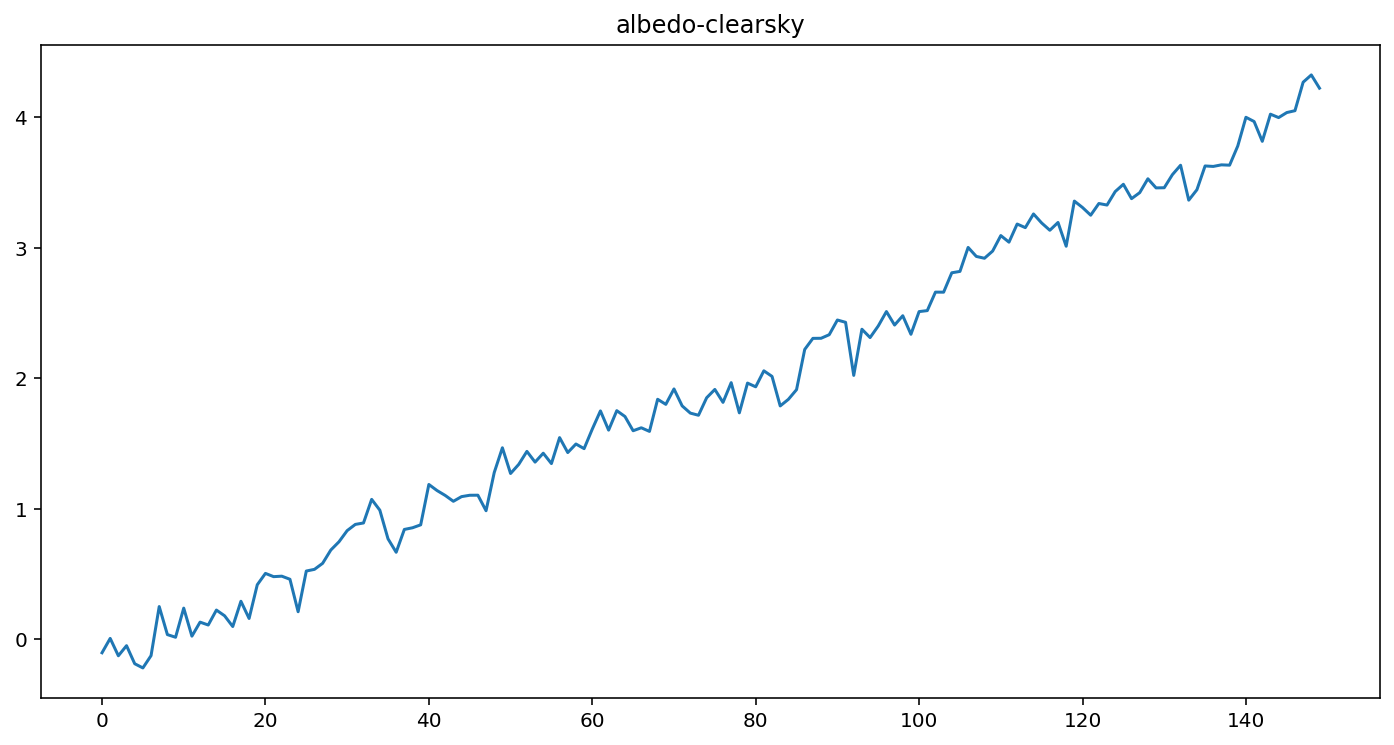

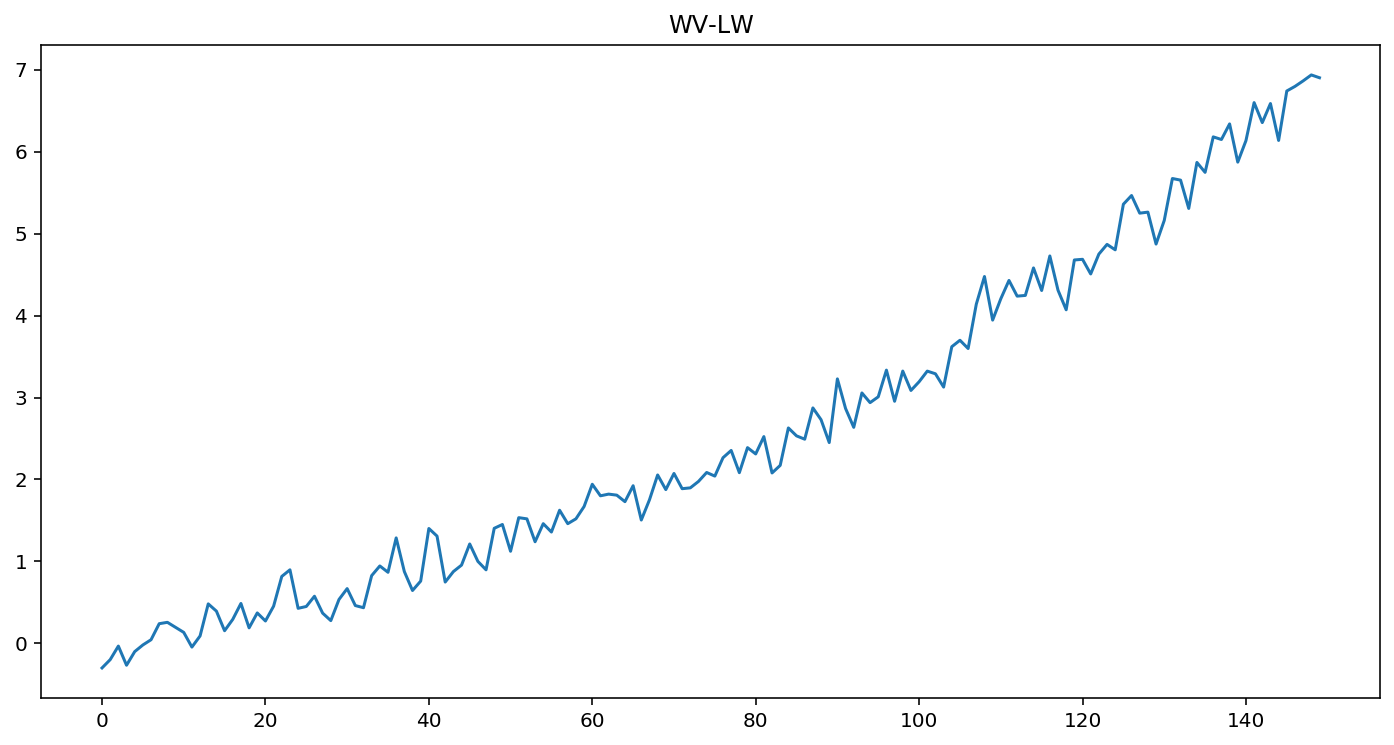

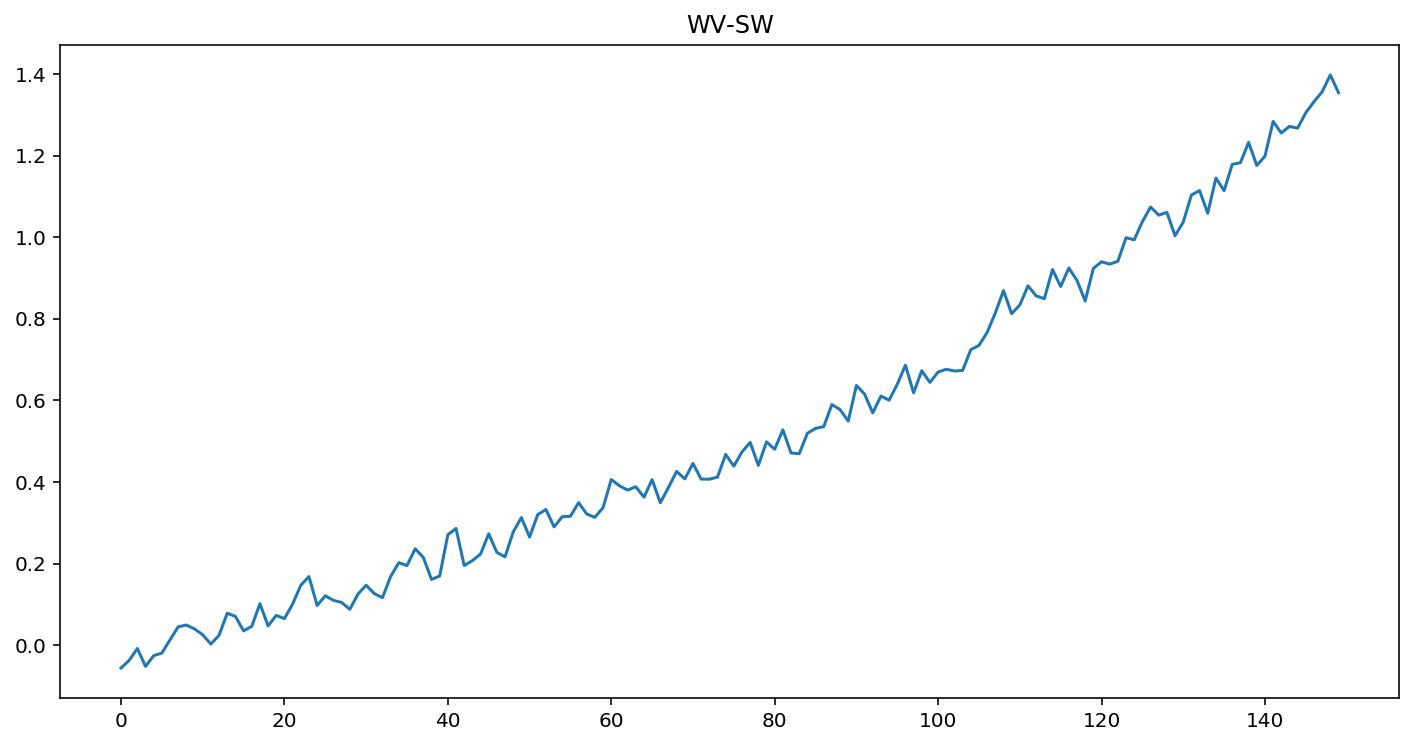

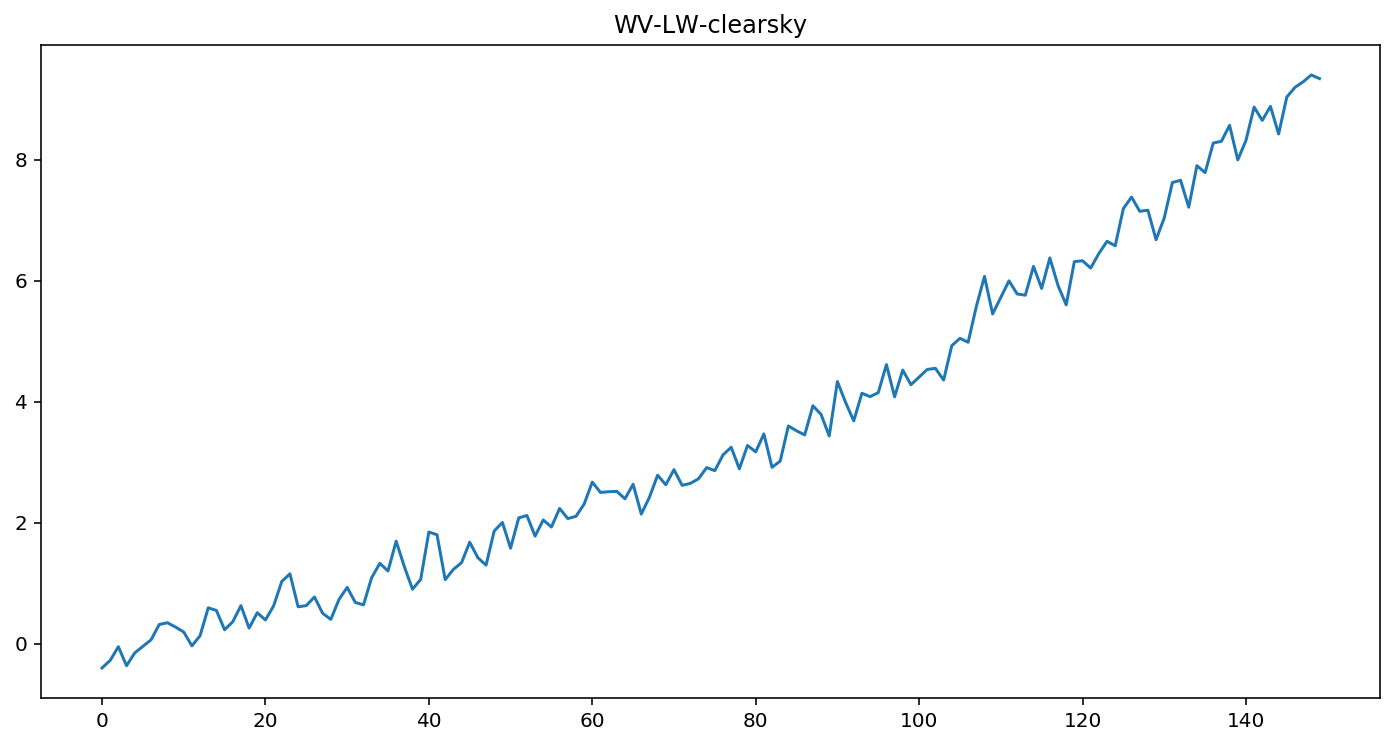

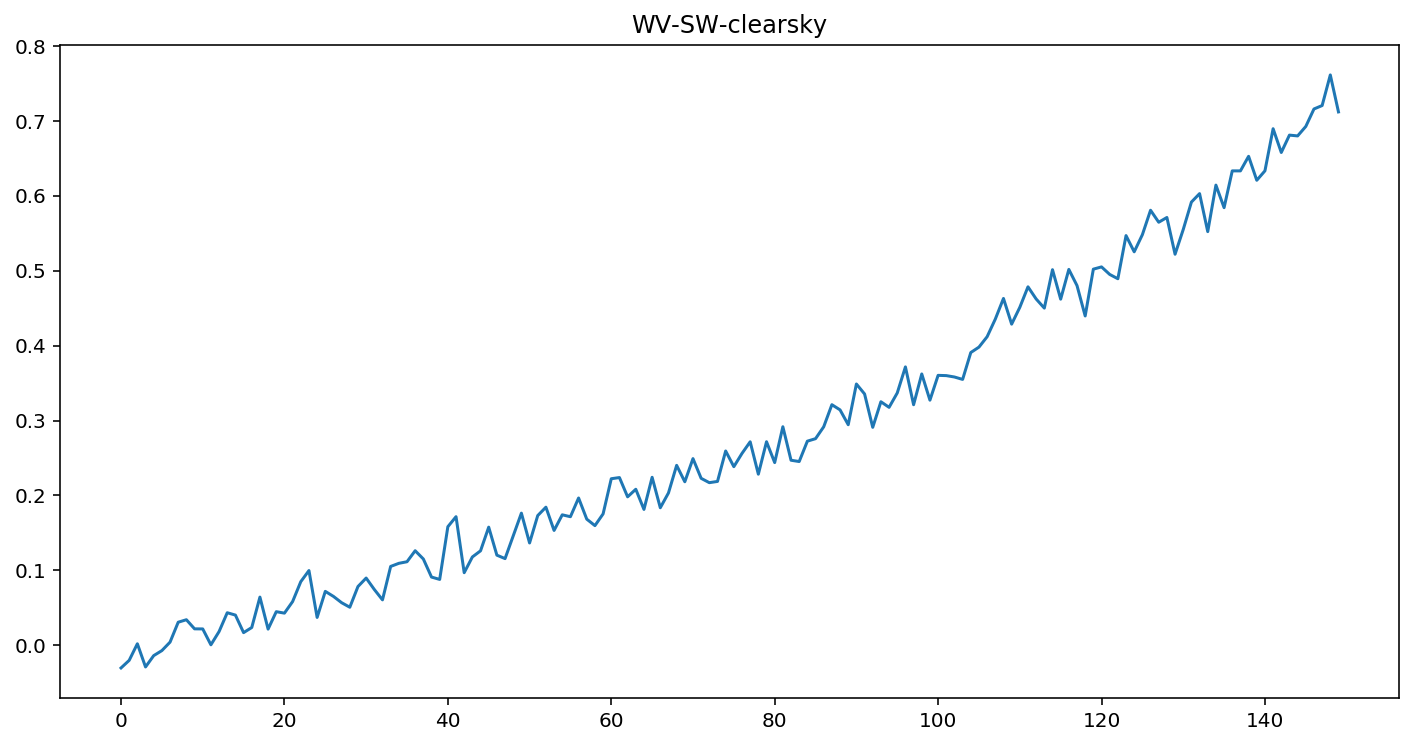

In [6]:
for name,fb_type in fb.items():
    plt.figure()
    plt.plot(fb_type)
    plt.title(name)

In [7]:
GMST, IMB, IMB_CS = compute_GMST_imbalance(col, model_name)

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 2 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 2 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 2 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in t

Text(0.5, 1.0, 'IMB_CS')

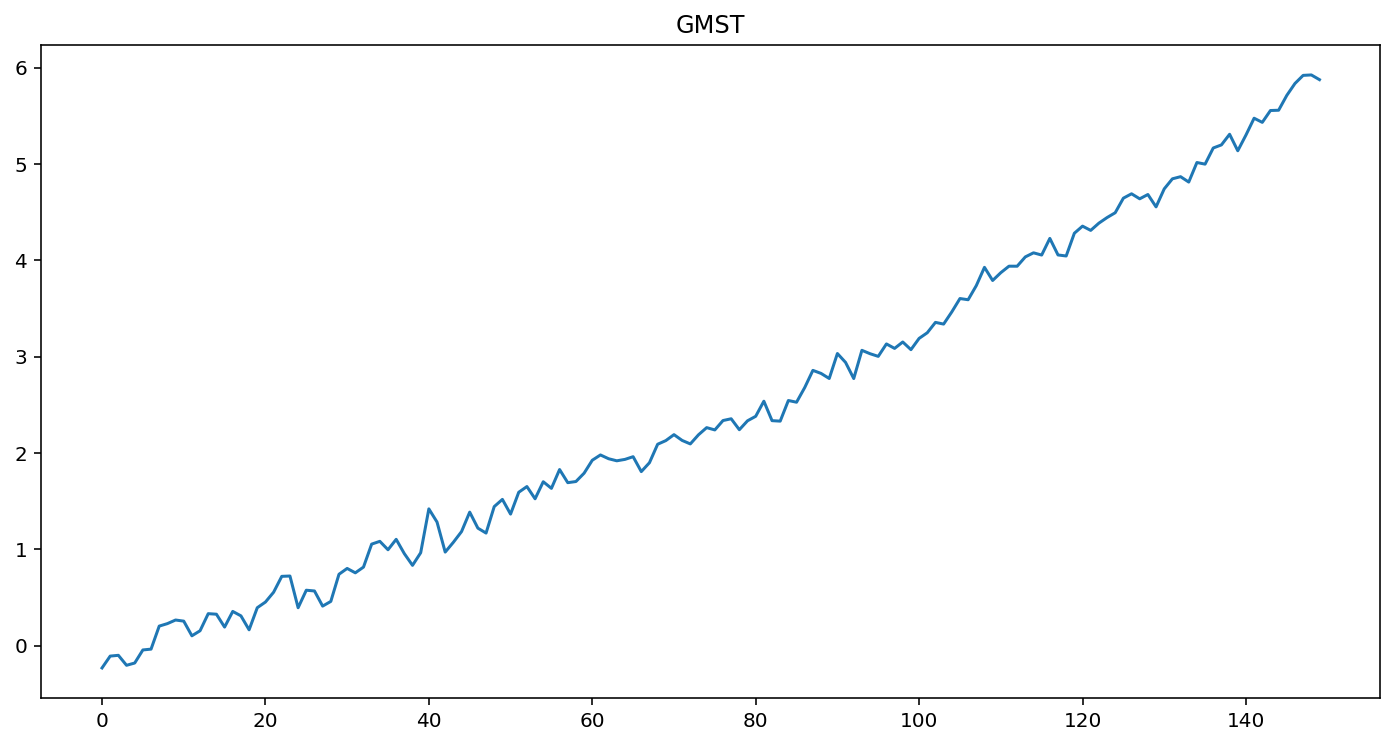

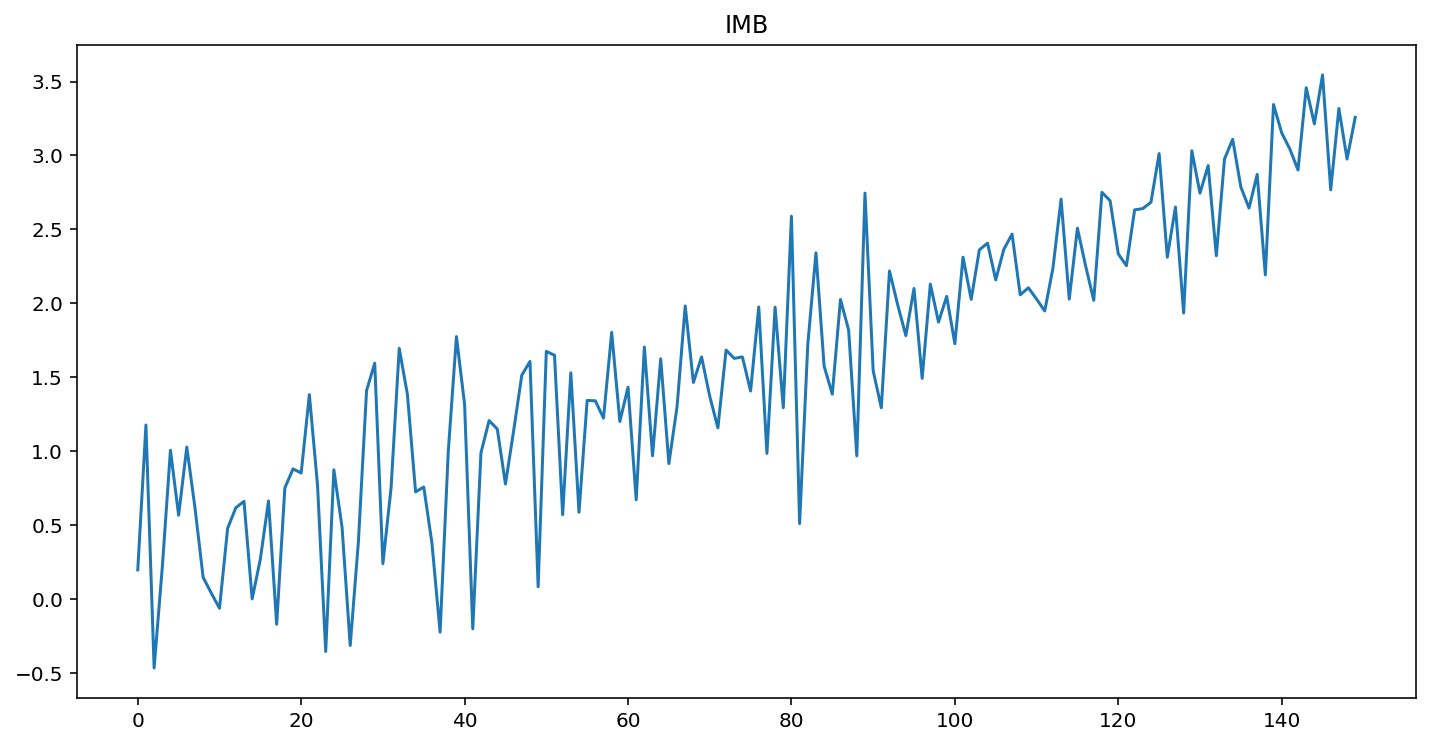

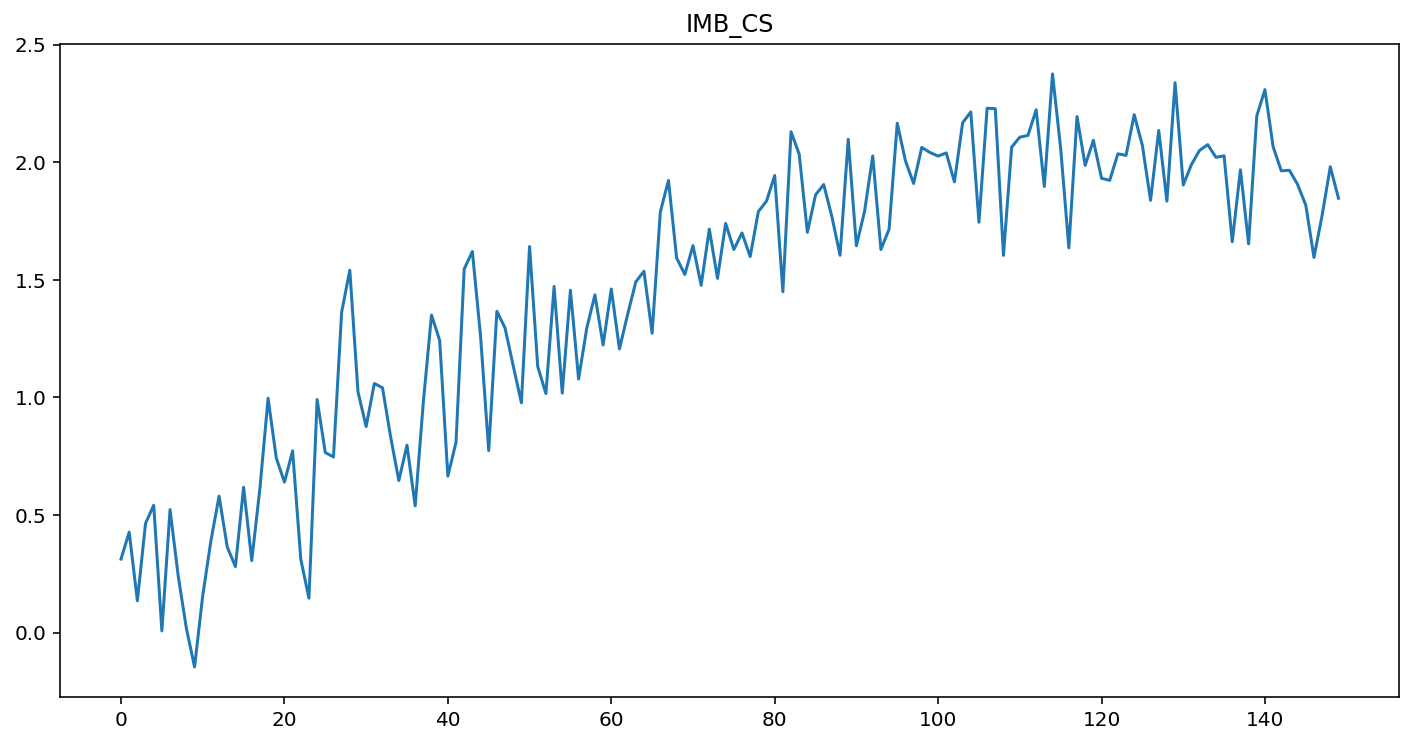

In [8]:
plt.figure()
plt.plot(GMST)
plt.title("GMST")

plt.figure()
plt.plot(IMB)
plt.title("IMB")

plt.figure()
plt.plot(IMB_CS)
plt.title("IMB_CS")